# IMPORTS

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 

# FILE HANDLER 



In [166]:


def file_handle(path): 
     data = pd.read_csv(path)

     # ct = ColumnTransformer( [('ordinal', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1), [1,4,5] )] )
     x1 = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

     sex_encode = pd.get_dummies(x1['sex'])
     smoker_encode = pd.get_dummies(x1['smoker'])
     region_code = pd.get_dummies(x1['region'])

     x2 = pd.concat((x1, sex_encode, smoker_encode, region_code), axis=1 )

     X = x2.drop(['sex', 'smoker', 'region'], axis=1)
     y = data['charges']

     """ Split the Data into Train and Set """
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

     return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = file_handle("./insurance.csv")
print(pd.read_csv('./insurance.csv').head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


# DECISION TREE

In [155]:
def decision_tree(X_train, X_test, y_train, y_test): 
     X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
     depth_range = range(2, 15)
     trainAccuracy = []
     testAccuracy  = []

     for i in depth_range: 
          """ Define and Fit  the Model   """
          dt_model = DecisionTreeRegressor(max_depth=i)
          dt_model.fit(X_train, y_train)

          """ Determine the Accuracy  """
          train_accuracy = dt_model.score(X_train, y_train)
          test_accuracy  = dt_model.score(X_test, y_test)

          trainAccuracy.append(train_accuracy * 100)
          testAccuracy.append(test_accuracy * 100)
     return depth_range, trainAccuracy, testAccuracy

# DECISION TREE GRAPH

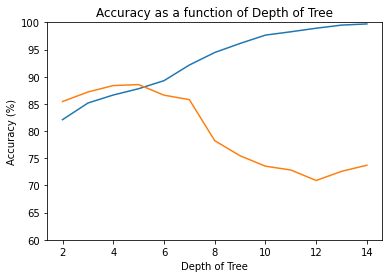

In [151]:

depth_range, trainAccuracy, testAccuracy = decision_tree(X_train, X_test, y_train, y_test)

def graph_decision_tree(depth_range, trainAccuracy, testAccuracy): 
     depth_range = depth_range
     trainAccuracy = trainAccuracy
     testAccuracy = testAccuracy
     plt.plot(depth_range, trainAccuracy)
     plt.plot(depth_range, testAccuracy)
     plt.ylim(60, 100)
     plt.xlabel('Depth of Tree')
     plt.ylabel('Accuracy (%)')
     plt.title('Accuracy as a function of Depth of Tree')

     return 

graph_decision_tree(depth_range, trainAccuracy, testAccuracy)

# RANDOM FOREST

In [158]:
from sklearn.ensemble import RandomForestRegressor

depth_range, trainAccuracy, testAccuracy = decision_tree(X_train, X_test, y_train, y_test)

def random_tree_regressor(X_train, X_test, y_train, y_test): 
     X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
     ft_range = range(2, 100, 2)
     ft_trainAccuracy = []
     ft_testAccuracy = []

     for i in ft_range: 
          rfc_model = RandomForestRegressor(n_estimators=i)

          rfc_model.fit(X_train, y_train)

          train_accuracy = rfc_model.score(X_train, y_train)
          test_accuracy = rfc_model.score(X_test, y_test)
          

          ft_trainAccuracy.append(train_accuracy * 100)
          ft_testAccuracy.append(test_accuracy * 100)
     
     return ft_range, ft_trainAccuracy, ft_testAccuracy


ft_range, ft_trainAccuracy, ft_testAccuracy = random_tree_regressor(X_train, X_test, y_train, y_test)



# RANDOM FOREST GRAPH

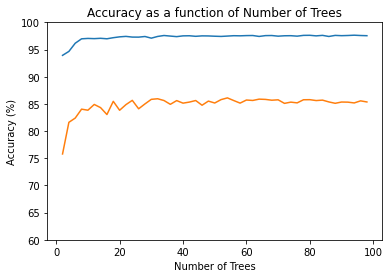

In [157]:

def random_tree_regressor_graph(ft_range, ft_trainAccuracy, ft_testAccuracy): 
     ft_range, ft_trainAccuracy, ft_testAccuracy = ft_range, ft_trainAccuracy, ft_testAccuracy
     plt.plot(ft_range, ft_trainAccuracy)
     plt.plot(ft_range, ft_testAccuracy)
     plt.ylim(60, 100)
     plt.xlabel('Number of Trees')
     plt.ylabel('Accuracy (%)')
     plt.title('Accuracy as a function of Number of Trees')

     return 

random_tree_regressor_graph(ft_range, ft_trainAccuracy, ft_testAccuracy)

# GRADIENT BOOSTING 

In [161]:

from sklearn.ensemble import GradientBoostingRegressor

depth_range, trainAccuracy, testAccuracy = decision_tree(X_train, X_test, y_train, y_test)

def gradient_booster_regressor(X_train, X_test, y_train, y_test): 
      X_train, X_test, y_train, y_test = X_train, X_test, y_train, y_test
      gb_range = range(10, 25, 1)
      gb_trainAccuracy = []
      gb_testAccuracy = []

      for i in ft_range: 
           gbc_model = GradientBoostingRegressor(n_estimators=i)

           gbc_model.fit(X_train, y_train)

           train_accuracy = gbc_model.score(X_train, y_train)
           test_accuracy = gbc_model.score(X_test, y_test)

           gb_trainAccuracy.append(train_accuracy * 100)
           gb_testAccuracy.append(test_accuracy * 100)
     
      return gb_range, gb_trainAccuracy, gb_testAccuracy


ValueError: x and y must have same first dimension, but have shapes (15,) and (10,)

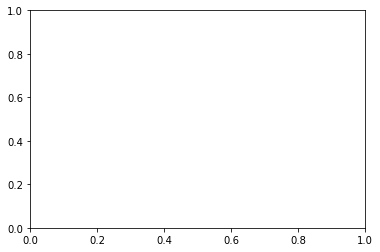

In [162]:
gb_range, gb_trainAccuracy, gb_testAccuracy = gradient_booster_regressor(X_train, X_test, y_train, y_test)

def gradient_booster_regressor_graph(gb_range, gb_trainAccuracy, gb_testAccuracy): 
     gb_range, gb_trainAccuracy, gb_testAccuracy = gb_range, gb_trainAccuracy, gb_testAccuracy
     
     plt.plot(gb_range, gb_trainAccuracy)
     plt.plot(gb_range, gb_testAccuracy)
     
     plt.ylim(60, 100)
     plt.xlabel('Number of Trees')
     plt.ylabel('Accuracy (%)')
     plt.title('Accuracy as a function of Number of Trees')

     return 

gradient_booster_regressor_graph(gb_range, gb_trainAccuracy, gb_testAccuracy)


# print(train_accuracy)
# print(test_accuracy)

In [ ]:
# Checking whether there is so NA values 
# sb.heatmap(data.isnull())

# If there is: we can interpolate to fill the NA values 
# data['age] = data['age].interpolate() 

In [21]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
X = data.values[:,:-1]
y = data.values[:,-1]

X

array([[19, 'female', 27.9, 0, 'yes', 'southwest'],
       [18, 'male', 33.77, 1, 'no', 'southeast'],
       [28, 'male', 33.0, 3, 'no', 'southeast'],
       ...,
       [18, 'female', 36.85, 0, 'no', 'southeast'],
       [21, 'female', 25.8, 0, 'no', 'southwest'],
       [61, 'female', 29.07, 0, 'yes', 'northwest']], dtype=object)

In [186]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

data = pd.read_csv('./insurance.csv').head()
data

X_train, X_test, y_train, y_test = train_test_split(data.values[:,:-1], data.values[:,-1], test_size=0.2, random_state = 15)

ct = ColumnTransformer( [('ordinal', OrdinalEncoder(handle_unknown= 'use_encoded_value', unknown_value = -1), [1,4,5] ),('non_transformed','passthrough',[0,2,3])] )

X_train = ct.fit_transform(X_train)

print(y_train)


[21984.47061 3866.8552 1725.5523 16884.924]
